# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [31]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [32]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [33]:
Y = data['affair']

In [34]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [36]:
model.fit(X_train, Y_train)

LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [37]:
predictions = model.predict_proba(X_test)

In [38]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [39]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [40]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


### Оценка качества модели

Считаем accuracy последней модели

In [41]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [79]:
# какая точность получилась?
Accuracy = (tp + tn) / (tp + fp + fn + tn)
Accuracy

0.7204188481675393

In [43]:
precision = tp / (tp + fp)
precision

0.5681233933161953

### Используем готовые библиотеки

In [44]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [45]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [46]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.307813319349764, 1.0, 0.048952983887575935)
(0.3074501573976915, 0.9982964224872232, 0.05209819330650033)
(0.30761154855643047, 0.9982964224872232, 0.05253954681521709)
(0.3077731092436975, 0.9982964224872232, 0.052909515713353464)
(0.30793483972674723, 0.9982964224872232, 0.053728565973712436)
(0.30809674027339645, 0.9982964224872232, 0.05418294180295906)
(0.30825881115202525, 0.9982964224872232, 0.054563816586932594)
(0.30842105263157893, 0.9982964224872232, 0.054741308910460286)
(0.30858346498156924, 0.9982964224872232, 0.055453396224127656)
(0.3087460484720759, 0.9982964224872232, 0.05780133973421305)
(0.30890880337374804, 0.9982964224872232, 0.05932823568271177)
(0.3090717299578059, 0.9982964224872232, 0.059365536314583946)
(0.3092348284960422, 0.9982964224872232, 0.061822305705162894)
(0.3093980992608237, 0.9982964224872232, 0.062105307592902635)
(0.30956154252509244, 0.9982964224872232, 0.062440168260400476)
(0.3091966173361522, 0.9965928449744463, 0.06245992363324933)
(0.309

In [47]:
from sklearn.metrics import average_precision_score

In [48]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5370782474582139

### ROC

In [49]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [50]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [51]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.944558911420308)
(0.0, 0.0017035775127768314, 0.9445589114203078)
(0.0, 0.017035775127768313, 0.8789939257006147)
(0.0007558578987150416, 0.017035775127768313, 0.8786478755171719)
(0.0007558578987150416, 0.028960817717206135, 0.8743556643003139)
(0.0022675736961451248, 0.028960817717206135, 0.8701673087202547)
(0.0022675736961451248, 0.034071550255536626, 0.8668201190288752)
(0.003779289493575208, 0.034071550255536626, 0.8579621184749097)
(0.003779289493575208, 0.03577512776831346, 0.8557638761510924)
(0.0045351473922902496, 0.03577512776831346, 0.8523294500483832)
(0.0045351473922902496, 0.03747870528109029, 0.8505415357994489)
(0.006046863189720333, 0.03747870528109029, 0.8373703327026221)
(0.006046863189720333, 0.049403747870528106, 0.8283556783016599)
(0.006802721088435374, 0.049403747870528106, 0.8272571005879265)
(0.006802721088435374, 0.05281090289608177, 0.8244237903168096)
(0.007558578987150416, 0.05281090289608177, 0.8228902787905844)
(0.007558578987150416, 0.054

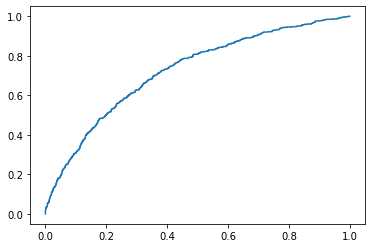

In [52]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [53]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [54]:
model2 = LogisticRegression()

In [55]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [56]:
model2.fit( X_train_short, Y_train )

LogisticRegression()

In [57]:
predictions2 = model2.predict_proba( X_test_short )

In [58]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

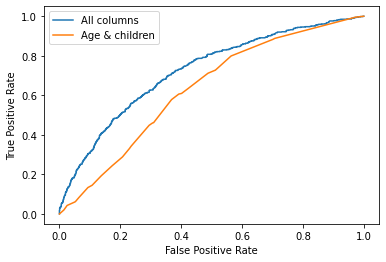

In [59]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [60]:
from sklearn.metrics import roc_curve

In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
roc_auc_score( Y_test, predictions[:, 1] )

0.5141550167462996

In [63]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [64]:
from sklearn.metrics import auc

In [65]:
auc( fpr, tpr )

0.7225943566902437

In [66]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [67]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [68]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [69]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [70]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

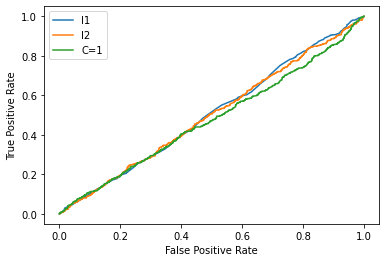

In [71]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [72]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [73]:
Y = data['affair']

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [75]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [76]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [77]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

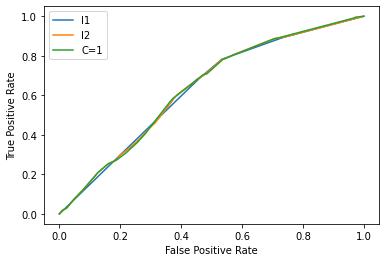

In [78]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

## Домашняя работа

Сформируем новый набор признаков

In [87]:
X_dz = data[['children', 'yrs_married', 'rate_marriage', 'age']]
X_dz.head()

,children,yrs_married,rate_marriage,age
0,3.0,9.0,3.0,32.0
1,3.0,13.0,3.0,27.0
2,0.0,2.5,4.0,22.0
3,4.0,16.5,4.0,37.0
4,1.0,9.0,5.0,27.0


In [88]:
# cоздаем нашу модель
model_ = LogisticRegression()

In [89]:
# разобьем наши данные
X_dz_train, X_dz_test, Y_train, Y_test = train_test_split(X_dz, Y, test_size=0.3, random_state=0)

In [90]:
# обучаем нашу модель
model_.fit(X_dz_train, Y_train)

LogisticRegression()

In [91]:
# делаем предсказания на тесте
y_pred_dz = model_.predict_proba(X_dz_test)

In [110]:
# посмотрим точность (predictions) и полноту (recoll)
pr_dz, re_dz, thres_dz = precision_recall_curve( Y_test, predictions[:, 1] )

In [111]:
# посмотрим что получилось
for line in zip( pr_dz, re_dz, thres_dz ):
    print( line )

(0.31780104712041884, 1.0, 0.279795283487591)
(0.36133333333333334, 0.8929159802306426, 0.28149088927592053)
(0.40563620836891545, 0.7825370675453048, 0.3851641646907603)
(0.41002949852507375, 0.6869851729818781, 0.3871550612660184)


In [112]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.39435848824796277

### график prediction-recoll

Text(0, 0.5, 'prediction')

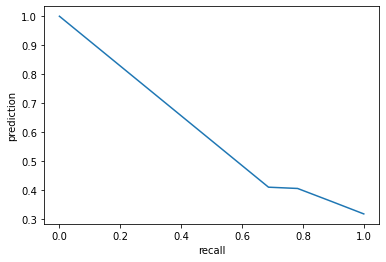

In [114]:
# построим график predictions-recoll
plt.plot(re_dz, pr_dz)
plt.xlabel('recall')
plt.ylabel('prediction')

### Построим график roc

In [117]:
# false positive rate (неверно предсказанные) and true positive rate(верно предсказанные), thres_dz- трэшхолд(сдвиг)
fpr_dz, tpr_dz, thres_dz = roc_curve( Y_test, y_pred_dz[:, 1] )

Text(0, 0.5, 'True Positive Rate')

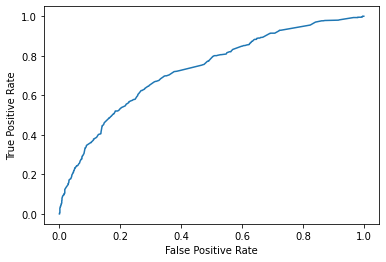

In [118]:
plt.plot( fpr_dz, tpr_dz)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [124]:
# посщитаем площадь под кривой
square = roc_auc_score( Y_test, y_pred_dz[:, 1] )
square

0.7295450493791416

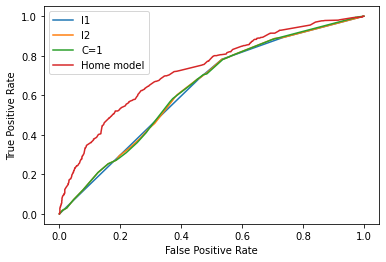

In [126]:
# Сравним график с другими моделями
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )
plt.plot( fpr_dz, tpr_dz, label = 'Home model' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

Как мы видим из предложенных моделей самая наилучшая - последняя